In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
from pandas.plotting import parallel_coordinates

In [2]:
# Reading the data into a DataFrame
ambdata = pd.read_csv('annual_ambulance_data.csv',encoding = 'ISO-8859-1')
ambdata = ambdata.set_index('LGA')

profiles = pd.read_csv('lga_profile.csv',encoding = 'ISO-8859-1')
profiles = profiles.set_index('LGA')

#Concatenating the two datasets
lgadata = pd.concat([ambdata, profiles], axis=1)
lgadata


,Perc_under_15mins,AVG_RT_sec,Total_calls,MetropolitanRural,Departmental_region,Area_of_LGA_sq_km,Travel_time_from_Melbourne_mins,Remoteness_category,Population,Number_of_hospitals,Number_of_public_hospitals,Number_of_private_hospitals,Ppl_who_live_near_public_transport_percent,Median_household_income_aud,Hosp_admiss_per_1000_pop
West Wimmera (S),37.1,1318,194,Rural,Grampians,9106,318,Outer Regional Australia,4089,2,2,0,8.6,815,464.6
Queenscliffe (B),34.6,1135,208,Rural,Barwon-South Western,9,86,Inner Regional Australia,3058,0,0,0,66.9,1022,666.3
Towong (S),33.8,1414,320,Rural,Hume,6674,304,Outer Regional Australia,5889,2,2,0,5.3,850,282.4
Buloke (S),29.1,1536,358,Rural,Loddon Mallee,8001,205,Outer Regional Australia,6221,5,5,0,7.1,742,562.8
Hindmarsh (S),55.6,1147,378,Rural,Grampians,7524,285,Outer Regional Australia,5695,4,4,0,20.6,785,669.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Melbourne (C),88.3,612,10715,Metropolitan,Western Metropolitan,37,3,Major Cities of Australia,116447,23,8,15,99.2,1352,257.6
Brimbank (C),76.6,768,10718,Metropolitan,Western Metropolitan,123,19,Major Cities of Australia,195469,5,1,4,84.0,1106,413.8
Hume (C),66.5,866,12201,Metropolitan,Northern Metropolitan,504,33,Major Cities of Australia,183263,4,3,1,75.3,1214,400.4
Casey (C),79.8,730,12887,Metropolitan,Southern Metropolitan,409,36,Major Cities of Australia,275116,8,2,6,62.4,1342,443.8


In [3]:
#Creates a new row Demand as the number of calls per 1000 people
#Creates a new row Population Density
#Creates a new row Hospital Density
lgadata['Pop_den'] = lgadata['Population']/lgadata['Area_of_LGA_sq_km']
lgadata['Hosp_den'] = lgadata['Number_of_hospitals']/lgadata['Area_of_LGA_sq_km']
lgadata['Demand'] = lgadata['Total_calls']/(lgadata['Population']/1000)

#Calculating percentage of high demand LGAs (>65 calls per 1000 people) that have less than 60% of trips under 15 mins
highdemand = lgadata[lgadata['Demand']>65]
lowrt = highdemand[highdemand['Perc_under_15mins']<60]
ratio = 100*len(lowrt)/len(highdemand)
print(ratio)

#47% of LGA's with high demand have less than 60% of their trips under 60 mins

47.05882352941177


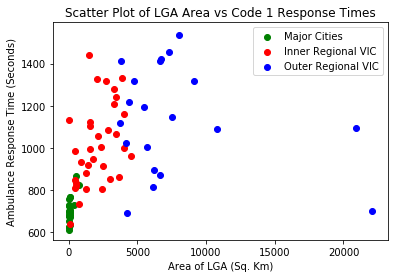

In [4]:
#Scatter plot of LGA Area vs Avg Response Time
cities=lgadata.loc[lgadata["Remoteness_category"]=='Major Cities of Australia']
inner_region=lgadata.loc[lgadata["Remoteness_category"]=='Inner Regional Australia']
outer_region=lgadata.loc[lgadata["Remoteness_category"]=='Outer Regional Australia']

a='Area_of_LGA_sq_km'
b='AVG_RT_sec'

plt.scatter(cities.loc[:,a],cities.loc[:,b],color='green', label='Major Cities')
plt.scatter(inner_region.loc[:,a],inner_region.loc[:,b],color='red', label = 'Inner Regional VIC')
plt.scatter(outer_region.loc[:,a],outer_region.loc[:,b],color='blue', label = 'Outer Regional VIC')

plt.legend() #Show legend
plt.ylabel("Ambulance Response Time (Seconds)")
plt.xlabel("Area of LGA (Sq. Km)")
plt.title("Scatter Plot of LGA Area vs Code 1 Response Times")
plt.show()

In [5]:
plt.rcParams['figure.figsize'] = (16, 6)

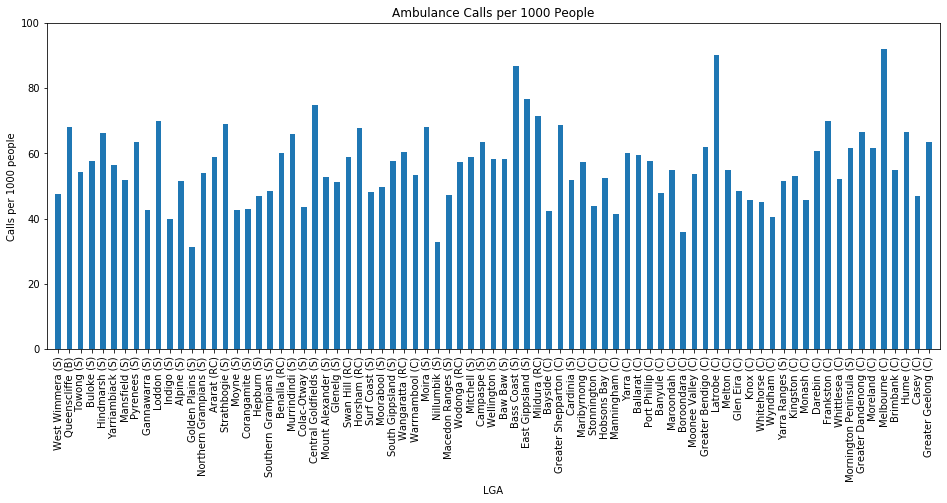

<Figure size 72x72 with 0 Axes>

In [6]:
#Plots a bar chart of the number of ambulance calls per 1000 people in each LGA
demand = lgadata["Demand"].tolist()
lganames = lgadata.index

plt.bar(arange(79), demand, width = 0.5)
plt.ylim(0,100)
plt.xlim(-1, 79)
plt.xticks(arange(79), lganames, rotation = 90)
plt.ylabel("Calls per 1000 people")
plt.xlabel("LGA")
plt.title("Ambulance Calls per 1000 People")
plt.figure(figsize=(1,1))

plt.show()


In [7]:
# Calculates the pearson correlation coefficient of the following features
Features = ['Area_of_LGA_sq_km','Pop_den','Travel_time_from_Melbourne_mins','Hosp_den','Ppl_who_live_near_public_transport_percent','Median_household_income_aud','Hosp_admiss_per_1000_pop','Demand']
X = 'AVG_RT_sec'
featdict = {}

for i in Features:
    featdict[i] = lgadata[X].corr(lgadata[i])

# Creating a dataframe of pearson r
pearsonDF = pd.DataFrame({'Pearson r': featdict})
pearsonDF.sort_values('Pearson r')


,Pearson r
Ppl_who_live_near_public_transport_percent,-0.894530
Pop_den,-0.614495
Median_household_income_aud,-0.587706
Hosp_den,-0.482288
Demand,-0.066134
Hosp_admiss_per_1000_pop,0.181983
Area_of_LGA_sq_km,0.402418
Travel_time_from_Melbourne_mins,0.471571


In [8]:
def normalize(rawData,feature):
    '''
    (DataFrame, str) -> Series
    Returns the normalized values for a given feature
    '''
    maxval = rawData[feature].max()
    minval = rawData[feature].min()
    normalizedvals = (rawData[feature] - minval)/(maxval-minval)
    
    return normalizedvals

In [9]:
def categorize(row):
    '''
    Takes a row in a dataframe and returns its bin category
    '''
    if row['MetropolitanRural'] == 'Metropolitan':
        val = 'Metropolitan'
    elif row['AVG_RT_sec'] <= 900:
        val = 'Rural Low RT'
    else:
        val = 'Rural High RT'
    return val

In [10]:
plt.rcParams['figure.figsize'] = (14,8)

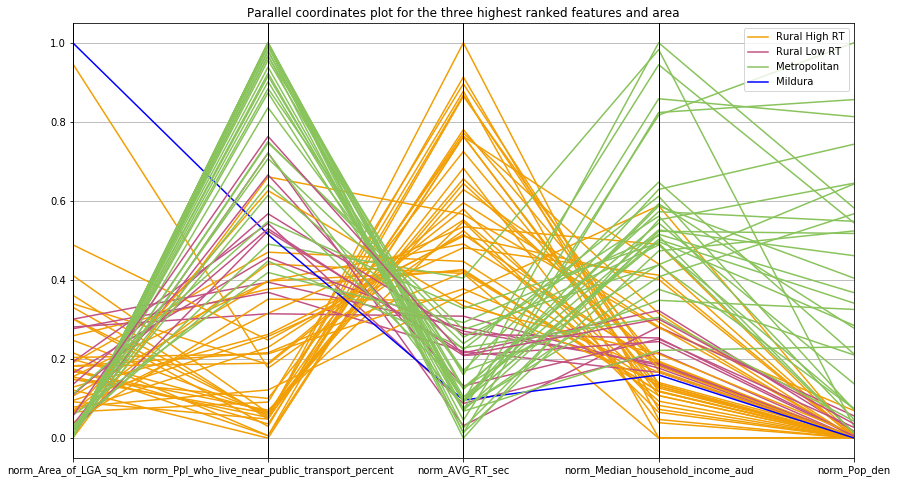

In [11]:
# Normalise features between 0 and 1, to ensure comparability of axes
features = ['Ppl_who_live_near_public_transport_percent','Pop_den','Median_household_income_aud','Area_of_LGA_sq_km','AVG_RT_sec']
for feature in features:
    lgadata['norm_'+feature] = normalize(lgadata, feature)

# Creating a new column for category
lgadata['bin'] = lgadata.apply(categorize, axis=1)
lgadata.loc[['Mildura (RC)'],'bin'] = 'Mildura'

# Draw a parallel coordinates plot with 79 lines for each LGA
# Different colored lines for different category
parallel_coordinates(lgadata[['norm_Area_of_LGA_sq_km','norm_Ppl_who_live_near_public_transport_percent','norm_AVG_RT_sec','norm_Median_household_income_aud','norm_Pop_den','bin']],'bin', color = ['#F29F05','#C25283','#89C35C','b'])
plt.title("Parallel coordinates plot for the three highest ranked features and area")
plt.show()

In [29]:
plt.rcParams['figure.figsize'] = (8,6)
lgadata.head()

,Perc_under_15mins,AVG_RT_sec,Total_calls,MetropolitanRural,Departmental_region,Area_of_LGA_sq_km,Travel_time_from_Melbourne_mins,Remoteness_category,Population,Number_of_hospitals,...,Hosp_admiss_per_1000_pop,Pop_den,Hosp_den,Demand,norm_Ppl_who_live_near_public_transport_percent,norm_Pop_den,norm_Median_household_income_aud,norm_Area_of_LGA_sq_km,norm_AVG_RT_sec,bin
West Wimmera (S),37.1,1318,194,Rural,Grampians,9106,318,Outer Regional Australia,4089,2,...,464.6,0.449045,0.000220,47.444363,0.063525,0.000000,0.107616,0.411666,0.764069,Rural High RT
Queenscliffe (B),34.6,1135,208,Rural,Barwon-South Western,9,86,Inner Regional Australia,3058,0,...,666.3,339.777778,0.000000,68.018313,0.660861,0.069527,0.278974,0.000000,0.566017,Rural High RT
Towong (S),33.8,1414,320,Rural,Hume,6674,304,Outer Regional Australia,5889,2,...,282.4,0.882379,0.000300,54.338597,0.029713,0.000089,0.136589,0.301611,0.867965,Rural High RT
Buloke (S),29.1,1536,358,Rural,Loddon Mallee,8001,205,Outer Regional Australia,6221,5,...,562.8,0.777528,0.000625,57.547018,0.048156,0.000067,0.047185,0.361662,1.000000,Rural High RT
Hindmarsh (S),55.6,1147,378,Rural,Grampians,7524,285,Outer Regional Australia,5695,4,...,669.9,0.756911,0.000532,66.374012,0.186475,0.000063,0.082781,0.340076,0.579004,Rural High RT


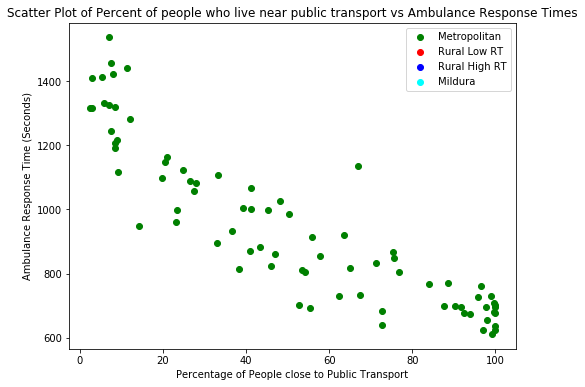

In [40]:
#Scatter plot of LGA Area vs Avg Response Time

a=features[0] #Ppl_who_live_near_public_transport_percent
b='AVG_RT_sec'

metro = lgadata.loc[lgadata['bin']=='Metropolitan']
rural_lowRT = lgadata.loc[lgadata['bin']=='Rural Low RT']
rural_highRT = lgadata.loc[lgadata['bin']=='Rural High RT']
mildura = lgadata.loc[lgadata['bin']=='Mildura']


plt.scatter(metro.loc[:,a],metro.loc[:,b],color='green', label='Metropolitan')
plt.scatter(rural_lowRT.loc[:,a],rural_lowRT.loc[:,b],color='red', label = 'Rural Low RT')
plt.scatter(rural_highRT.loc[:,a],rural_highRT.loc[:,b],color='blue', label = 'Rural High RT')
plt.scatter(mildura.loc[:,a],mildura.loc[:,b],color='cyan', label = 'Mildura')

plt.legend() #Show legend
plt.ylabel("Ambulance Response Time (Seconds)")
plt.xlabel("Percentage of People close to Public Transport")
plt.title("Scatter Plot of Percent of people who live near public transport vs Ambulance Response Times")
plt.show()